In [1]:
import warnings

from pathlib import Path
from collections import Counter

import pickle
import pandas as pd
import seaborn as sns

import ecoselekt.utils as utils

warnings.filterwarnings("ignore")

In [2]:
EXP_ID = "apch"
PROJECTS = [
    "activemq",
    "camel",
    "cassandra",
    "flink",
    "groovy",
    "hadoop",
    "hadoop-hdfs",
    "hadoop-mapreduce",
    "hbase",
    "hive",
    "ignite",
    "kafka",
    "spark",
    "zeppelin",
    "zookeeper",
]

DATA_DIR = Path().cwd() / "ecoselekt" / "data"
MODELS_DIR = Path().cwd() / "ecoselekt" / "models"
RESULTS_DIR = Path().cwd() / "results"
FIGURES_DIR = Path().cwd() / "figures"

DATA_DIR.mkdir(parents=True, exist_ok=True)
MODELS_DIR.mkdir(parents=True, exist_ok=True)
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

In [3]:
dist_dict = {}
for project_name in PROJECTS:
    commit_metrics = utils.get_apachejit_commit_metrics(project_name)
    dist_dict[project_name] = dict(Counter(commit_metrics["buggy"]))
    dist_dict[project_name]["year"] = f"{commit_metrics['year'].min()}-{commit_metrics['year'].max()}"
    print(f"{project_name}: {dist_dict[project_name]}")


activemq: {True: 1404, False: 4722, 'year': '2005-2019'}
camel: {False: 19622, True: 3078, 'year': '2007-2019'}
cassandra: {False: 5042, True: 3117, 'year': '2009-2019'}
flink: {False: 8880, True: 2811, 'year': '2010-2019'}
groovy: {False: 6445, True: 1614, 'year': '2003-2019'}
hadoop: {False: 11964, 'year': '2009-2019'}
hadoop-hdfs: {False: 685, True: 2222, 'year': '2009-2019'}
hadoop-mapreduce: {False: 483, True: 838, 'year': '2009-2019'}
hbase: {False: 4948, True: 3782, 'year': '2007-2019'}
hive: {False: 2619, True: 4223, 'year': '2008-2019'}
ignite: {False: 9597, True: 2439, 'year': '2014-2019'}
kafka: {False: 1269, True: 1115, 'year': '2011-2019'}
spark: {False: 833, True: 632, 'year': '2010-2019'}
zeppelin: {False: 829, True: 622, 'year': '2013-2019'}
zookeeper: {False: 497, True: 342, 'year': '2007-2019'}


Text(0, 0.5, 'Ratio of positive labels')

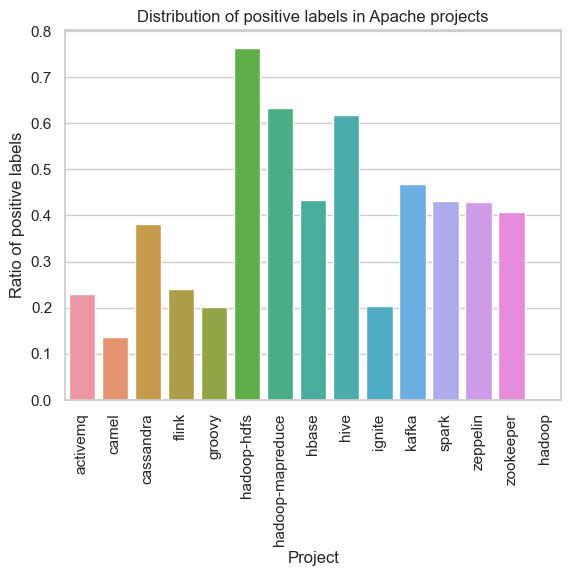

In [4]:
# make a dataframe from the dict
dist_df = pd.DataFrame.from_dict(dist_dict, orient="index")
dist_df = dist_df.reset_index()
dist_df = dist_df.rename(columns={"index": "project", 0: "negative", 1: "positive"})
dist_df["total"] = dist_df["negative"] + dist_df["positive"]
dist_df["positive_ratio"] = dist_df["positive"] / dist_df["total"]
dist_df["negative_ratio"] = dist_df["negative"] / dist_df["total"]

# plot the distribution
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="project", y="positive_ratio", data=dist_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title("Distribution of positive labels in Apache projects")
ax.set_xlabel("Project")
ax.set_ylabel("Ratio of positive labels")


In [5]:
dist_df

,project,positive,negative,year,total,positive_ratio,negative_ratio
0,activemq,1404.0,4722,2005-2019,6126.0,0.229187,0.770813
1,camel,3078.0,19622,2007-2019,22700.0,0.135595,0.864405
2,cassandra,3117.0,5042,2009-2019,8159.0,0.382032,0.617968
3,flink,2811.0,8880,2010-2019,11691.0,0.240441,0.759559
4,groovy,1614.0,6445,2003-2019,8059.0,0.200273,0.799727
5,hadoop-hdfs,2222.0,685,2009-2019,2907.0,0.764362,0.235638
6,hadoop-mapreduce,838.0,483,2009-2019,1321.0,0.634368,0.365632
7,hbase,3782.0,4948,2007-2019,8730.0,0.433219,0.566781
8,hive,4223.0,2619,2008-2019,6842.0,0.617217,0.382783
9,ignite,2439.0,9597,2014-2019,12036.0,0.202642,0.797358


In [6]:
dist_df["positive_ratio"] = dist_df["positive_ratio"] * 100
dist_df["positive_ratio"] = dist_df["positive_ratio"].round(2)
dist_df

,project,positive,negative,year,total,positive_ratio,negative_ratio
0,activemq,1404.0,4722,2005-2019,6126.0,22.92,0.770813
1,camel,3078.0,19622,2007-2019,22700.0,13.56,0.864405
2,cassandra,3117.0,5042,2009-2019,8159.0,38.20,0.617968
3,flink,2811.0,8880,2010-2019,11691.0,24.04,0.759559
4,groovy,1614.0,6445,2003-2019,8059.0,20.03,0.799727
5,hadoop-hdfs,2222.0,685,2009-2019,2907.0,76.44,0.235638
6,hadoop-mapreduce,838.0,483,2009-2019,1321.0,63.44,0.365632
7,hbase,3782.0,4948,2007-2019,8730.0,43.32,0.566781
8,hive,4223.0,2619,2008-2019,6842.0,61.72,0.382783
9,ignite,2439.0,9597,2014-2019,12036.0,20.26,0.797358


In [7]:
for project_name in ["activemq", "camel", "cassandra", "flink", "groovy", "hbase", "hive", "ignite"]:
    with open(DATA_DIR / f"{EXP_ID}_{project_name}_windows.pkl", "rb") as f:
        windows = pickle.load(f)
    print(f"{project_name}: {len(windows)}")

activemq: 26
camel: 109
cassandra: 36
flink: 54
groovy: 36
hbase: 39
hive: 30
ignite: 56
